In [208]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [210]:
df=pd.read_csv("Impact_of_Mobile_Phone_on_Students_Health.csv")
print(df)

       Names    Age Gender  Mobile Phone  Mobile Operating System   \
0        Ali  21-25    Male           Yes                  Android   
1      Bilal  21-25    Male           Yes                  Android   
2     Hammad  21-25    Male           Yes                      IOS   
3   Abdullah  21-25    Male           Yes                  Android   
4      Waqar  21-25    Male           Yes                      IOS   
..       ...    ...     ...           ...                      ...   
95    Zahoor  21-25    Male           Yes                      IOS   
96    Hafeez  16-20    Male           Yes                  Android   
97     Babar  16-20    Male           Yes                  Android   
98    Rizwan  16-20    Male           Yes                  Android   
99     Lubna  21-25  Female           Yes                  Android   

   Mobile phone use for education Mobile phone activities  \
0                       Sometimes            Social Media   
1                       Sometimes    

In [212]:
print(df.head())

      Names    Age Gender  Mobile Phone  Mobile Operating System   \
0       Ali  21-25    Male           Yes                  Android   
1     Bilal  21-25    Male           Yes                  Android   
2    Hammad  21-25    Male           Yes                      IOS   
3  Abdullah  21-25    Male           Yes                  Android   
4     Waqar  21-25    Male           Yes                      IOS   

  Mobile phone use for education Mobile phone activities Helpful for studying  \
0                      Sometimes            Social Media                  Yes   
1                      Sometimes            Social Media                  Yes   
2                      Sometimes            All of these                  Yes   
3                     Frequently            All of these                  Yes   
4                     Frequently            All of these                  Yes   

     Educational Apps Daily usages Performance impact      Usage distraction  \
0  Educational Vid

In [214]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Names                           100 non-null    object
 1   Age                             100 non-null    object
 2   Gender                          100 non-null    object
 3   Mobile Phone                    100 non-null    object
 4   Mobile Operating System         100 non-null    object
 5   Mobile phone use for education  98 non-null     object
 6   Mobile phone activities         99 non-null     object
 7   Helpful for studying            98 non-null     object
 8   Educational Apps                98 non-null     object
 9   Daily usages                    99 non-null     object
 10  Performance impact              98 non-null     object
 11  Usage distraction               98 non-null     object
 12  Attention span                  99 non-null     obj

In [89]:
print(df.describe(include='all'))

       Names    Age Gender  Mobile Phone  Mobile Operating System   \
count    100    100     100           100                      100   
unique   100      4       2             1                        2   
top      Ali  21-25    Male           Yes                  Android   
freq       1     72      81           100                       81   

       Mobile phone use for education Mobile phone activities  \
count                              98                      99   
unique                              4                       7   
top                         Sometimes            All of these   
freq                               53                      59   

       Helpful for studying    Educational Apps Daily usages  \
count                    98                  98           99   
unique                    2                   4            4   
top                     Yes  Educational Videos    4-6 hours   
freq                     94                  54           40   

  

In [216]:
print(df.isnull().sum())

Names                             0
Age                               0
Gender                            0
Mobile Phone                      0
Mobile Operating System           0
Mobile phone use for education    2
Mobile phone activities           1
Helpful for studying              2
Educational Apps                  2
Daily usages                      1
Performance impact                2
Usage distraction                 2
Attention span                    1
Useful features                   2
Health Risks                      2
Beneficial subject                1
Usage symptoms                    2
Symptom frequency                 1
Health precautions                1
Health rating                     1
dtype: int64


#### Q.1 How does the student report the health ratings?
#### Display the unique health ratings reported by the students

In [218]:

health_ratings = df['Health rating'].unique()
print(health_ratings)


['Excellent' 'Good' 'Fair' 'Good;Fair' 'Excellent;Good' 'Poor' nan
 'Excellent;Good;Fair;Poor']


#### Q.2 Health risks associated with mobile phone usage among students.
#### Display the unique values and their counts for the 'Health Risks' column to understand the impact of mobile phone usage on student health.

In [220]:

impact_on_health_counts = df['Health Risks'].value_counts()
print(impact_on_health_counts)



Health Risks
Yes               57
Only Partially    21
No                20
Name: count, dtype: int64



#### Q3.The most common reasons for mobile phone usage among students are:
#### Display the unique values and their counts for the 'Mobile phone activities' column


In [222]:

mobile_phone_activities_counts = df['Mobile phone activities'].value_counts()
print(mobile_phone_activities_counts)


Mobile phone activities
All of these                                        59
Social Media                                        22
Social Media;Web-browsing;Messaging;All of these     7
Web-browsing                                         5
Messaging                                            3
Social Media;All of these                            2
Social Media;Messaging                               1
Name: count, dtype: int64


#### Q.4 What specific health risks do students associate with mobile phone usage?
#### Display the unique values and their counts for the 'Usage symptoms' column to understand the specific health risks associated with mobile phone usage.


In [224]:

usage_symptoms_counts = df['Usage symptoms'].value_counts()
print(usage_symptoms_counts)


Usage symptoms
All of these                                                 32
Sleep disturbance                                            26
Headache                                                     23
Anxiety or Stress                                            12
Sleep disturbance;Anxiety or Stress                           4
Headache;Sleep disturbance;Anxiety or Stress;All of these     1
Name: count, dtype: int64


#### Q.5 Are there any correlations between the frequency of mobile phone usage and the reported health risks among students?
##### Calculate the correlation between the frequency of mobile phone usage and the reported health risks among students.
##### We will use the 'Daily usages' and 'Health Risks' columns for this analysis.
##### First, let's convert the 'Daily usages' column to numerical values for correlation analysis.


In [226]:
usage_mapping = {
    'Less than 1 hour': 1,
    '1-2 hours': 2,
    '2-4 hours': 3,
    '4-6 hours': 4,
    'More than 6 hours': 5
}
df['Daily usages (numeric)'] = df['Daily usages'].map(usage_mapping)

##### Convert 'Health Risks' to binary values (1 for 'Yes', 0 for 'No' and 'Only Partially')

In [229]:
health_risks_mapping = {
    'Yes': 1,
    'No': 0,
    'Only Partially': 0
}
df['Health Risks (binary)'] = df['Health Risks'].map(health_risks_mapping)

##### Calculate the correlation

In [231]:
correlation = df[['Daily usages (numeric)', 'Health Risks (binary)']].corr()
print(correlation)

                        Daily usages (numeric)  Health Risks (binary)
Daily usages (numeric)                1.000000              -0.052414
Health Risks (binary)                -0.052414               1.000000


#### The correlation matrix shows the following:
##### The daily mobile phone usage and health risks correlate to approximately -0.052.
##### This indicates a very weak negative correlation between the frequency of mobile phone usage and the reported health risks among students.

#### Visualize the distribution of Age

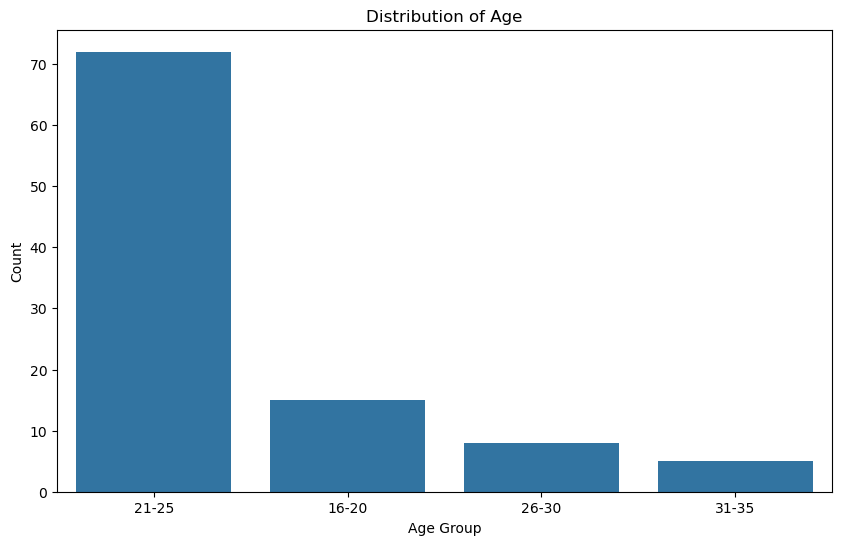

In [233]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Age')
plt.title('Distribution of Age')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

#### Visualize the distribution of Gender

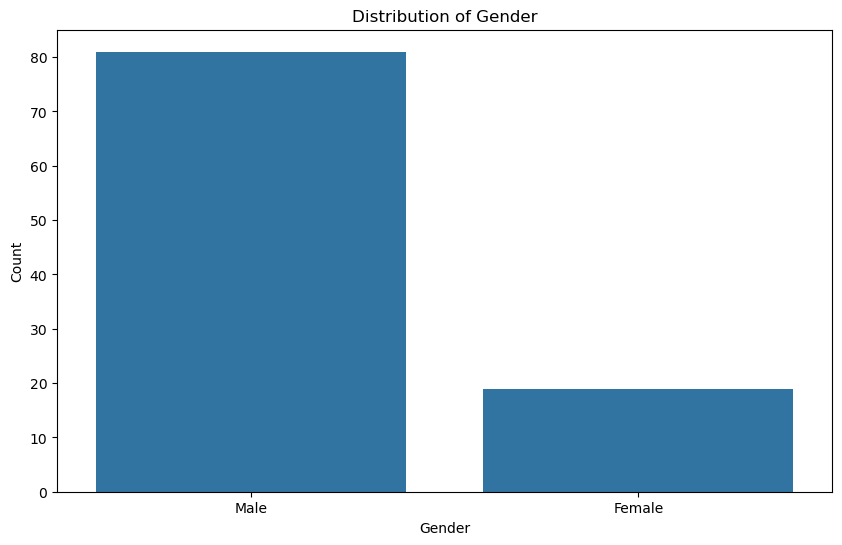

In [235]:

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Gender ')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


#### Visualize the distribution of Mobile Operating System

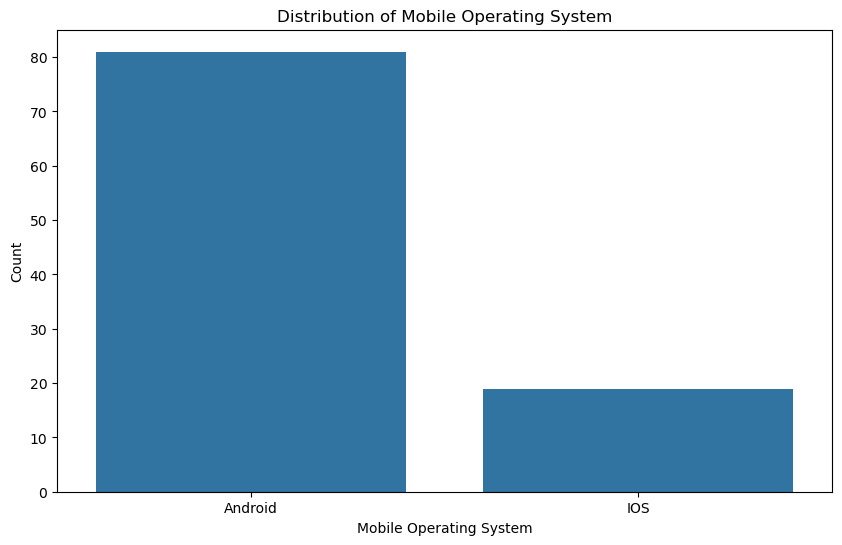

In [237]:

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Mobile Operating System ')
plt.title('Distribution of Mobile Operating System')
plt.xlabel('Mobile Operating System')
plt.ylabel('Count')
plt.show()


#### Visualize the distribution of Daily usages

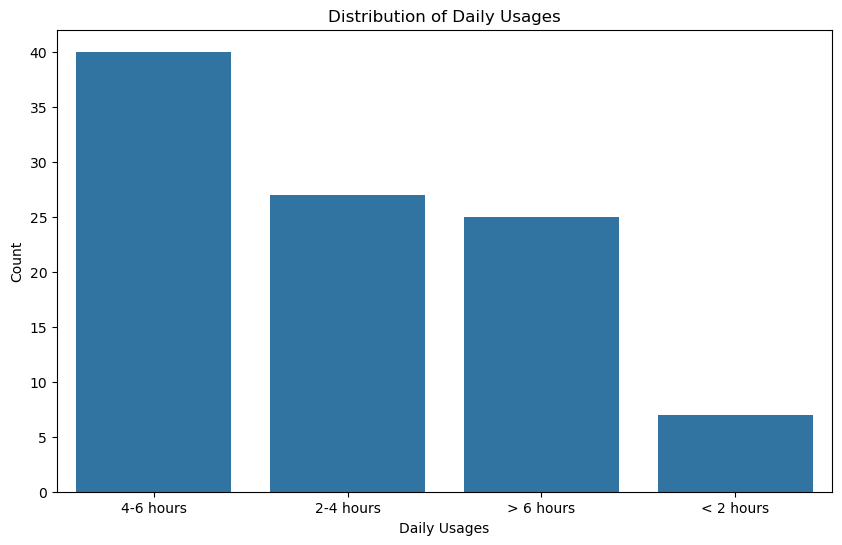

In [239]:

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Daily usages')
plt.title('Distribution of Daily Usages')
plt.xlabel('Daily Usages')
plt.ylabel('Count')
plt.show()

#### Visualize the impact on performance

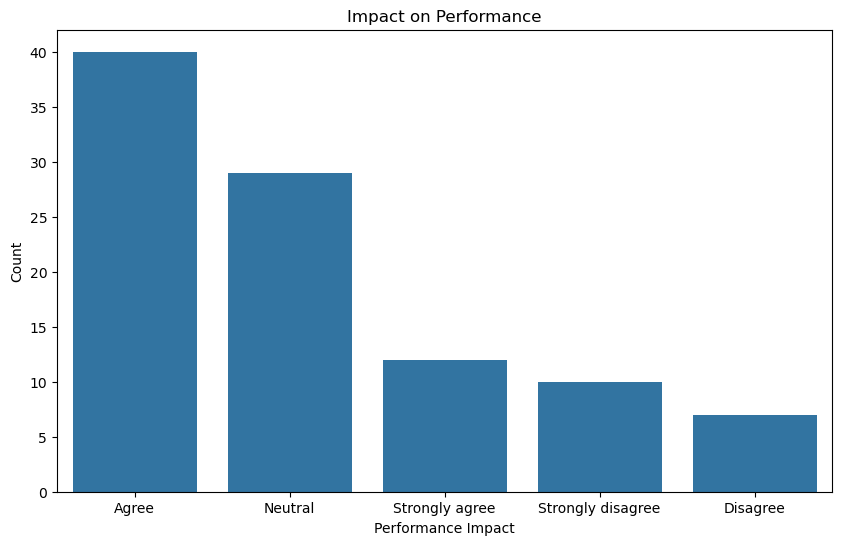

In [241]:

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Performance impact')
plt.title('Impact on Performance')
plt.xlabel('Performance Impact')
plt.ylabel('Count')
plt.show()

#### Select relevant columns for correlation analysis

In [245]:

correlation_data = df[['Daily usages', 'Symptom frequency']]


In [247]:
print(correlation_data.dtypes)
numeric_data = correlation_data.select_dtypes(include=[float, int])
correlation_matrix = numeric_data.corr()


non_numeric_columns = correlation_data.select_dtypes(exclude=[np.number]).columns
print(non_numeric_columns)


Daily usages         object
Symptom frequency    object
dtype: object
Index(['Daily usages', 'Symptom frequency'], dtype='object')


In [280]:
print(correlation_data.head())



  Daily usages Symptom frequency
0    4-6 hours             Never
1    4-6 hours         Sometimes
2    4-6 hours         Sometimes
3    2-4 hours             Never
4    > 6 hours         Sometimes


#### Calculate the correlation matrix

In [282]:
correlation_matrix = correlation_data.corr()

ValueError: could not convert string to float: '4-6 hours'

#### Plot the correlation matrix

C:\Users\user\anaconda3\Lib\site-packages\seaborn\matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
C:\Users\user\anaconda3\Lib\site-packages\seaborn\matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


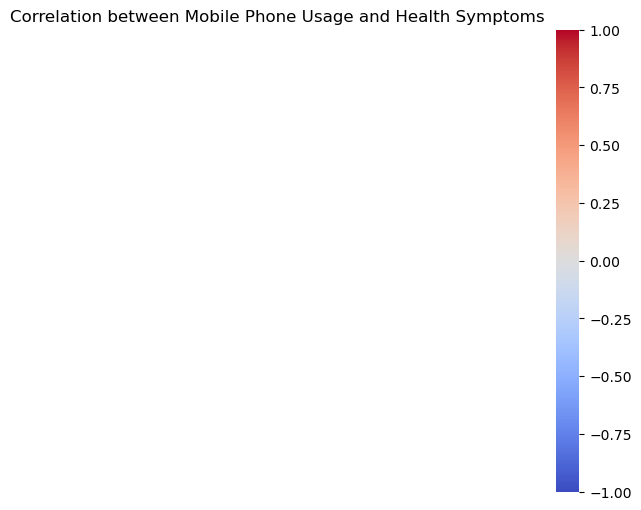

In [285]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation between Mobile Phone Usage and Health Symptoms')
plt.show()

#### Print the correlation matrix

In [288]:
print(correlation_matrix)

Empty DataFrame
Columns: []
Index: []


In [290]:
print(correlation_data.select_dtypes(include=[np.number]).columns)


Index([], dtype='object')









#### Summary:
- The majority of the students are in the age group 21-25.
- There is a higher number of male students compared to female students.
- Android is the most commonly used mobile operating system among the students.
- Most students use their mobile phones for 4-6 hours daily.
- The impact on performance varies, with many students agreeing that mobile phone usage impacts their performance.
- The correlation between daily mobile phone usage and symptom frequency is approximately 0.13, indicating a weak positive correlation. 
- This suggests that as mobile phone usage increases, the frequency of health symptoms slightly increases as well, but the relationship is not strong.